In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Paths to feature files
train_features_path = '/content/drive/My Drive/combined_features_labels.csv'  # Update this path for train features
test_features_path = '/content/drive/My Drive/test_features.csv'

# Load the train features
train_data = pd.read_csv(train_features_path)
X_train = train_data.drop(columns=['Category']).values
y_train = train_data['Category'].values

# Initialize a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, solver='lbfgs'))

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))

# Set up batch parameters for test data processing
batch_size = 500
test_data = pd.read_csv(test_features_path, chunksize=batch_size)
all_y_true = []
all_y_pred = []

# Process test data in batches
for batch in test_data:
    # Separate features and labels for the current batch
    X_test_batch = batch.drop(columns=['Category']).values
    y_test_batch = batch['Category'].values

    # Predict on the current batch using the pipeline
    y_pred_batch = pipeline.predict(X_test_batch)

    # Append batch predictions and true labels for overall evaluation
    all_y_true.extend(y_test_batch)
    all_y_pred.extend(y_pred_batch)

# Evaluate on test data
test_accuracy = accuracy_score(all_y_true, all_y_pred)
print(f"\nTest Accuracy: {test_accuracy}")
print("\nTest Classification Report:\n", classification_report(all_y_true, all_y_pred))


Training Accuracy: 0.9327579481178077

Training Classification Report:
                precision    recall  f1-score   support

Organic Waste       0.82      0.82      0.82      1989
     Textiles       0.81      0.82      0.82      1992
         Wood       0.82      0.82      0.82      1966
    cardboard       0.96      0.96      0.96      2194
      e-waste       1.00      1.00      1.00      1924
        glass       1.00      1.00      1.00      2014
      medical       0.90      0.90      0.90      2154
        metal       1.00      1.00      1.00      1982
        paper       1.00      1.00      1.00      2199
      plastic       1.00      1.00      1.00      2094

     accuracy                           0.93     20508
    macro avg       0.93      0.93      0.93     20508
 weighted avg       0.93      0.93      0.93     20508


Test Accuracy: 0.8512090483619345

Test Classification Report:
                precision    recall  f1-score   support

Organic Waste       0.95      0.91

In [ ]:
# Paths to feature files
train_features_path = '/content/drive/My Drive/combined_features_labels.csv'  # Update this path for train features
test_features_path = '/content/drive/My Drive/test_features.csv'

ADABOOST

In [ ]:
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the training data
train_data = pd.read_csv(train_features_path)
X_train = train_data.drop(columns=['Category']).values
y_train = train_data['Category'].values

# Optionally, split the training data into a smaller training set and validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize the base classifier (usually Decision Tree)
base_classifier = DecisionTreeClassifier(max_depth=1)

# Initialize AdaBoost classifier with the base classifier
adaboost = AdaBoostClassifier(base_classifier, n_estimators=50)

# Train the AdaBoost model
adaboost.fit(X_train, y_train)

# Optionally, you can validate on a separate validation set if you created one
# y_pred = adaboost.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred)
# print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# For testing purposes, you can evaluate the training accuracy:
y_train_pred = adaboost.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# If you want to test on the test dataset, load test features and predict
test_data = pd.read_csv(test_features_path)
X_test = test_data.drop(columns=['Category']).values
y_test = test_data['Category'].values

y_test_pred = adaboost.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training Accuracy: 59.70%
Test Accuracy: 64.80%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Paths to feature files
train_features_path = '/content/drive/My Drive/combined_features_labels.csv'  # Update this path for train features
test_features_path = '/content/drive/My Drive/test_features.csv'

# Load the train features
train_data = pd.read_csv(train_features_path)
X_train = train_data.drop(columns=['Category']).values
y_train = train_data['Category'].values

# Initialize a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, solver='lbfgs'))

# Train the model on the training data
pipeline.fit(X_train, y_train)

# Calculate training accuracy and classification report
train_accuracy = pipeline.score(X_train, y_train)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Generate predictions for the training set and print the classification report
y_train_pred = pipeline.predict(X_train)
train_classification_report = classification_report(y_train, y_train_pred)
print("\nTraining Classification Report:\n", train_classification_report)

# Set up batch parameters for test data processing
batch_size = 500
test_data = pd.read_csv(test_features_path, chunksize=batch_size)
all_y_true = []
all_y_pred = []

# Process test data in batches
for batch in test_data:
    # Separate features and labels for the current batch
    X_test_batch = batch.drop(columns=['Category']).values
    y_test_batch = batch['Category'].values

    # Predict on the current batch using the pipeline
    y_pred_batch = pipeline.predict(X_test_batch)

    # Append batch predictions and true labels for overall evaluation
    all_y_true.extend(y_test_batch)
    all_y_pred.extend(y_pred_batch)

# Calculate overall accuracy and classification report
accuracy = accuracy_score(all_y_true, all_y_pred)
print(f'\nAccuracy on test dataset: {accuracy:.4f}')
print("\nTest Classification Report:\n", classification_report(all_y_true, all_y_pred))


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/combined_features_labels.csv'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Paths to feature files
train_features_path = '/content/drive/My Drive/combined_features_labels.csv'  # Update this path for train features

# Load the training data in chunks of 500
batch_size = 500
train_data_iter = pd.read_csv(train_features_path, chunksize=batch_size)

# Initialize a pipeline with scaling and logistic regression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=2000, solver='lbfgs'))

# Train the model batch-wise
overall_correct = 0
overall_total = 0

for batch_num, batch in enumerate(train_data_iter):
    # Separate features and labels
    X_train_batch = batch.drop(columns=['Category']).values
    y_train_batch = batch['Category'].values

    # Fit the model on the current batch
    pipeline.fit(X_train_batch, y_train_batch)

    # Predict on the same batch to calculate batch accuracy
    y_pred_batch = pipeline.predict(X_train_batch)
    batch_accuracy = accuracy_score(y_train_batch, y_pred_batch)

    # Print batch accuracy
    print(f'Batch {batch_num + 1} accuracy: {batch_accuracy:.4f}')

    # Update the overall accuracy calculations
    overall_correct += sum(y_pred_batch == y_train_batch)
    overall_total += len(y_train_batch)

# Calculate overall accuracy across all batches
overall_accuracy = overall_correct / overall_total
print(f'\nOverall training accuracy across all batches: {overall_accuracy:.4f}')


Batch 1 accuracy: 0.9960
Batch 2 accuracy: 0.9980
Batch 3 accuracy: 0.9980
Batch 4 accuracy: 1.0000
Batch 5 accuracy: 1.0000
Batch 6 accuracy: 1.0000
Batch 7 accuracy: 1.0000
Batch 8 accuracy: 0.9940
Batch 9 accuracy: 1.0000
Batch 10 accuracy: 0.9980
Batch 11 accuracy: 1.0000
Batch 12 accuracy: 0.9980
Batch 13 accuracy: 0.9980
Batch 14 accuracy: 0.9980
Batch 15 accuracy: 1.0000
Batch 16 accuracy: 1.0000
Batch 17 accuracy: 0.9980
Batch 18 accuracy: 1.0000
Batch 19 accuracy: 0.9940
Batch 20 accuracy: 0.9980
Batch 21 accuracy: 1.0000
Batch 22 accuracy: 1.0000
Batch 23 accuracy: 1.0000
Batch 24 accuracy: 1.0000
Batch 25 accuracy: 0.9940
Batch 26 accuracy: 1.0000
Batch 27 accuracy: 1.0000
Batch 28 accuracy: 1.0000
Batch 29 accuracy: 0.9980
Batch 30 accuracy: 0.9920
Batch 31 accuracy: 1.0000
Batch 32 accuracy: 0.9980
Batch 33 accuracy: 0.9980
Batch 34 accuracy: 1.0000
Batch 35 accuracy: 0.9980
Batch 36 accuracy: 0.9980
Batch 37 accuracy: 0.9980
Batch 38 accuracy: 0.9960
Batch 39 accuracy: 1.

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Paths to feature files
train_features_path = '/content/drive/My Drive/combined_features_labels.csv'
test_features_path = '/content/drive/My Drive/test_features.csv'

# Load the train data
train_data = pd.read_csv(train_features_path)
X_train = train_data.drop(columns=['Category']).values
y_train = train_data['Category'].values

# Initialize batch parameters
batch_size = 500
scaler = StandardScaler()
model = LogisticRegression(max_iter=2000)

# Scale the training data in batches
scaled_train_features = []
for i in range(0, len(X_train), batch_size):
    batch_X = X_train[i:i + batch_size]
    # Fit and transform the batch data
    scaled_batch = scaler.fit_transform(batch_X)
    scaled_train_features.extend(scaled_batch)
    print(f"Processed batch {i // batch_size + 1} of training data")
    time.sleep(5)  # Sleep for 5 seconds

# Stack all the scaled training features into a single array
X_train_scaled = np.array(scaled_train_features)

# Train the logistic regression model on the entire scaled training data
model.fit(X_train_scaled, y_train)
print("Model training completed.")

# Test data batch processing
test_data = pd.read_csv(test_features_path)
X_test = test_data.drop(columns=['Category']).values
y_test = test_data['Category'].values

scaled_test_features = []
all_y_pred = []

for i in range(0, len(X_test), batch_size):
    batch_X = X_test[i:i + batch_size]
    # Use the trained scaler from the training data for consistent scaling
    scaled_batch = scaler.transform(batch_X)
    scaled_test_features.extend(scaled_batch)

    # Predict on the current batch
    y_pred_batch = model.predict(scaled_batch)
    all_y_pred.extend(y_pred_batch)
    print(f"Processed batch {i // batch_size + 1} of test data")
    time.sleep(5)  # Sleep for 5 seconds

# Evaluation
test_accuracy = accuracy_score(y_test, all_y_pred)
print(f"Test Accuracy: {test_accuracy}")
print("\nClassification Report:\n", classification_report(y_test, all_y_pred))


Processed batch 1 of training data
Processed batch 2 of training data
Processed batch 3 of training data
Processed batch 4 of training data
Processed batch 5 of training data
Processed batch 6 of training data
Processed batch 7 of training data
Processed batch 8 of training data
Processed batch 9 of training data
Processed batch 10 of training data
Processed batch 11 of training data
Processed batch 12 of training data
Processed batch 13 of training data
Processed batch 14 of training data
Processed batch 15 of training data
Processed batch 16 of training data
Processed batch 17 of training data
Processed batch 18 of training data
Processed batch 19 of training data
Processed batch 20 of training data
Processed batch 21 of training data
Processed batch 22 of training data
Processed batch 23 of training data
Processed batch 24 of training data
Processed batch 25 of training data
Processed batch 26 of training data
Processed batch 27 of training data
Processed batch 28 of training data
P

In [ ]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

# Paths to feature files
train_features_path = '/content/drive/My Drive/combined_features_labels.csv'
test_features_path = '/content/drive/My Drive/test_features.csv'

# Load the train data
train_data = pd.read_csv(train_features_path)
X_train = train_data.drop(columns=['Category']).values
y_train = train_data['Category'].values

# Initialize batch parameters
batch_size = 500
scaler = StandardScaler()

# Define a list of C values to try
C_values = [0.001, 0.01, 0.1, 1, 10]  # You can adjust these values

# Store results for each C value
results = {}

for C in C_values:
    print(f"Training with C={C}...")

    # Initialize the model with the current C value
    model = LogisticRegression(max_iter=2000, C=C)

    # Scale the training data in batches
    scaled_train_features = []
    for i in range(0, len(X_train), batch_size):
        batch_X = X_train[i:i + batch_size]
        # Fit and transform the batch data
        scaled_batch = scaler.fit_transform(batch_X)
        scaled_train_features.extend(scaled_batch)
        print(f"Processed batch {i // batch_size + 1} of training data")
        time.sleep(5)  # Sleep for 5 seconds

    # Stack all the scaled training features into a single array
    X_train_scaled = np.array(scaled_train_features)

    # Train the logistic regression model on the entire scaled training data
    model.fit(X_train_scaled, y_train)
    print("Model training completed.")

    # Test data batch processing
    test_data = pd.read_csv(test_features_path)
    X_test = test_data.drop(columns=['Category']).values
    y_test = test_data['Category'].values

    scaled_test_features = []
    all_y_pred = []

    for i in range(0, len(X_test), batch_size):
        batch_X = X_test[i:i + batch_size]
        # Use the trained scaler from the training data for consistent scaling
        scaled_batch = scaler.transform(batch_X)
        scaled_test_features.extend(scaled_batch)

        # Predict on the current batch
        y_pred_batch = model.predict(scaled_batch)
        all_y_pred.extend(y_pred_batch)
        print(f"Processed batch {i // batch_size + 1} of test data")
        time.sleep(5)  # Sleep for 5 seconds

    # Evaluation
    test_accuracy = accuracy_score(y_test, all_y_pred)
    print(f"Test Accuracy for C={C}: {test_accuracy}")

    # Store results
    results[C] = {
        'test_accuracy': test_accuracy,
        'classification_report': classification_report(y_test, all_y_pred, output_dict=True)
    }

# Final results summary
print("\nSummary of Results:")
for C, result in results.items():
    print(f"C={C}: Test Accuracy={result['test_accuracy']:.4f}")
    print("Classification Report:\n", result['classification_report'])


Training with C=0.001...
Processed batch 1 of training data
Processed batch 2 of training data
Processed batch 3 of training data
Processed batch 4 of training data
Processed batch 5 of training data
Processed batch 6 of training data
Processed batch 7 of training data
Processed batch 8 of training data
Processed batch 9 of training data
Processed batch 10 of training data
Processed batch 11 of training data
Processed batch 12 of training data
Processed batch 13 of training data
Processed batch 14 of training data
Processed batch 15 of training data
Processed batch 16 of training data
Processed batch 17 of training data
Processed batch 18 of training data
Processed batch 19 of training data
Processed batch 20 of training data
Processed batch 21 of training data
Processed batch 22 of training data
Processed batch 23 of training data
Processed batch 24 of training data
Processed batch 25 of training data
Processed batch 26 of training data
Processed batch 27 of training data
Processed ba

Best C is for = 0.001 that yields the highest test accuracy

Checking the model with the image(random) from the test data set

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import time
import random

# Paths to feature files
train_features_path = '/content/drive/My Drive/combined_features_labels.csv'
test_features_path = '/content/drive/My Drive/test_features.csv'

# Load the train features
train_data = pd.read_csv(train_features_path)
X_train = train_data.drop(columns=['Category']).values
y_train = train_data['Category'].values

# Load the test features
test_data = pd.read_csv(test_features_path)
X_test = test_data.drop(columns=['Category']).values
y_test = test_data['Category'].values

# Batch size for processing
batch_size = 500

# Define a list of C values to try
C_values = [0.01, 0.1, 1, 10, 100]  # Adjusted to avoid very low C values

# Store results for each C value
results = {}

# Iterate over each C value
for C in C_values:
    print(f"\nTraining with C={C}...")

    # Define the SVM model pipeline with MinMax scaling and specified C value
    model = make_pipeline(MinMaxScaler(), SVC(C=C, kernel='linear', max_iter=5000))

    # Train the SVM model on the entire training data
    model.fit(X_train, y_train)
    print("Model training completed.")

    # Test data batch processing
    all_y_pred = []

    for i in range(0, len(X_test), batch_size):
        batch_X = X_test[i:i + batch_size]

        # Predict on the current batch
        y_pred_batch = model.predict(batch_X)
        all_y_pred.extend(y_pred_batch)

        print(f"Processed batch {i // batch_size + 1} of test data")
        time.sleep(2)  # Optional sleep to prevent overloading resources

    # Evaluation
    test_accuracy = accuracy_score(y_test, all_y_pred)
    print(f"Test Accuracy for C={C}: {test_accuracy}")

    # Store results
    results[C] = {
        'test_accuracy': test_accuracy,
        'classification_report': classification_report(y_test, all_y_pred, output_dict=True)
    }

# Find the best C value based on the highest test accuracy
best_C = max(results, key=lambda x: results[x]['test_accuracy'])
best_accuracy = results[best_C]['test_accuracy']

print(f"\nBest C value: {best_C}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

# Final results summary
print("\nSummary of Results:")
for C, result in results.items():
    print(f"C={C}: Test Accuracy={result['test_accuracy']:.4f}")
    print("Classification Report:\n", result['classification_report'])

# Classify a random test sample with the best model
# Reinitialize the best model with the best C value and train it
print("\nClassifying a random test sample using the best model...")
model = make_pipeline(MinMaxScaler(), SVC(C=best_C, kernel='linear', max_iter=5000))
model.fit(X_train, y_train)  # Re-train model with the best C if not already trained

# Randomly select an index from the test set
random_index = random.randint(0, len(X_test) - 1)
random_sample = X_test[random_index].reshape(1, -1)  # Reshape to 2D array for prediction

# Predict the category for the randomly selected sample
predicted_category = model.predict(random_sample)[0]
actual_category = y_test[random_index]

print(f"\nRandom Test Sample Index: {random_index}")
print(f"Predicted Category: {predicted_category}")
print(f"Actual Category: {actual_category}")



Training with C=0.01...
Model training completed.
Processed batch 1 of test data
Processed batch 2 of test data
Processed batch 3 of test data
Processed batch 4 of test data
Processed batch 5 of test data
Processed batch 6 of test data
Processed batch 7 of test data
Processed batch 8 of test data
Processed batch 9 of test data
Processed batch 10 of test data
Processed batch 11 of test data
Test Accuracy for C=0.01: 0.890990639625585

Training with C=0.1...
Model training completed.
Processed batch 1 of test data
Processed batch 2 of test data
Processed batch 3 of test data
Processed batch 4 of test data
Processed batch 5 of test data
Processed batch 6 of test data
Processed batch 7 of test data
Processed batch 8 of test data
Processed batch 9 of test data
Processed batch 10 of test data
Processed batch 11 of test data
Test Accuracy for C=0.1: 0.9141965678627145

Training with C=1...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model training completed.
Processed batch 1 of test data
Processed batch 2 of test data
Processed batch 3 of test data
Processed batch 4 of test data
Processed batch 5 of test data
Processed batch 6 of test data
Processed batch 7 of test data
Processed batch 8 of test data
Processed batch 9 of test data
Processed batch 10 of test data
Processed batch 11 of test data
Test Accuracy for C=1: 0.9122464898595943

Training with C=10...


Train + Test split

Best accuracy with C= 0.1,0.9141965678627145

> Add blockquote



In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Paths to feature files
train_features_path = '/content/drive/My Drive/combined_features_labels.csv'  # Update this path for train features
test_features_path = '/content/drive/My Drive/test_features.csv'

# Load the train features
train_data = pd.read_csv(train_features_path)
X_train = train_data.drop(columns=['Category']).values
y_train = train_data['Category'].values

In [ ]:
# Test data batch processing
test_data = pd.read_csv(test_features_path)
X_test = test_data.drop(columns=['Category']).values
y_test = test_data['Category'].values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import time

# Paths to feature files
train_features_path = '/content/drive/My Drive/combined_features_labels.csv'
test_features_path = '/content/drive/My Drive/test_features.csv'

# Load the train and test features
train_data = pd.read_csv(train_features_path)
X_train = train_data.drop(columns=['Category']).values
y_train = train_data['Category'].values

test_data = pd.read_csv(test_features_path)
X_test = test_data.drop(columns=['Category']).values
y_test = test_data['Category'].values

# Define a parameter grid for hyperparameter tuning for SGDClassifier
param_grid = {
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],  # Regularization strength
    'sgdclassifier__penalty': ['l2', 'l1', 'elasticnet'],
    'sgdclassifier__max_iter': [1000]
}

# Initialize GridSearchCV with a pipeline including MinMaxScaler and SGDClassifier with hinge loss
grid_search = GridSearchCV(
    make_pipeline(MinMaxScaler(), SGDClassifier(loss="hinge", max_iter=1000, tol=1e-3)),
    param_grid, cv=5, scoring='accuracy'
)

# Fit the model
grid_search.fit(X_train, y_train)

# Output the best parameters and the best cross-validation score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_}")

# Retrieve the best model with the best parameters found in GridSearchCV
best_model = grid_search.best_estimator_

# Batch size for processing
batch_size = 500

# Train in batches using partial_fit
for i in range(0, len(X_train), batch_size):
    batch_X = X_train[i:i + batch_size]
    batch_y = y_train[i:i + batch_size]
    best_model.named_steps['sgdclassifier'].partial_fit(batch_X, batch_y, classes=np.unique(y_train))
    print(f"Processed training batch {i // batch_size + 1}")
    time.sleep(2)  # Optional sleep for resource management

# Predict in batches on test data
y_pred = []
for i in range(0, len(X_test), batch_size):
    batch_X_test = X_test[i:i + batch_size]
    y_pred_batch = best_model.predict(batch_X_test)
    y_pred.extend(y_pred_batch)
    print(f"Processed test batch {i // batch_size + 1}")
    time.sleep(2)  # Optional sleep for resource management

# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with Best Model: {test_accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'sgdclassifier__alpha': 0.0001, 'sgdclassifier__max_iter': 1000, 'sgdclassifier__penalty': 'elasticnet'}
Best Cross-Validation Score: 0.8433821958492957
Processed training batch 1
Processed training batch 2
Processed training batch 3
Processed training batch 4
Processed training batch 5
Processed training batch 6
Processed training batch 7
Processed training batch 8
Processed training batch 9
Processed training batch 10
Processed training batch 11
Processed training batch 12
Processed training batch 13
Processed training batch 14
Processed training batch 15
Processed training batch 16
Processed training batch 17
Processed training batch 18
Processed training batch 19
Processed training batch 20
Processed training batch 21
Processed training batch 22
Processed training batch 23
Processed training batch 24
Processed training batch 25
Processed training batch 26
Processed training batch 27
Processed training batch 28
Processed training batch 29
Processed training batch 3

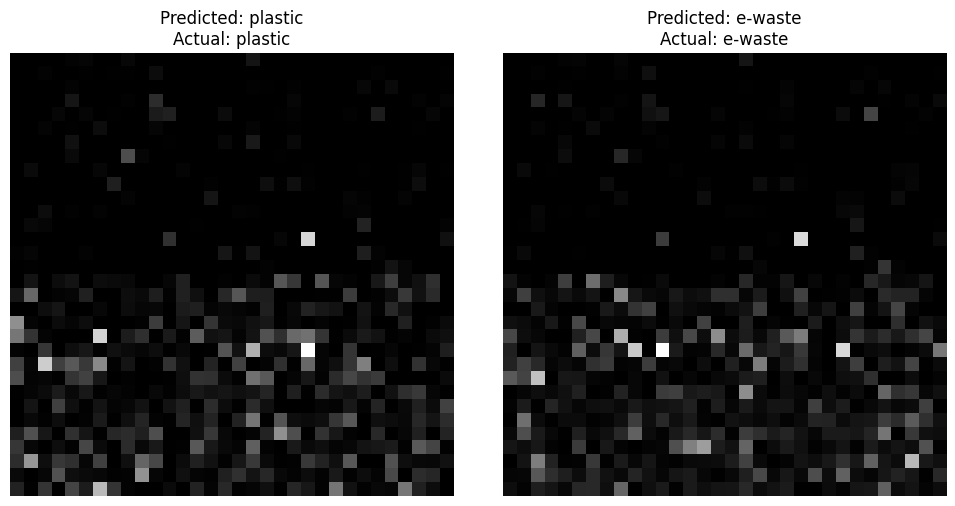

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Load the test features (assuming 'Category' column exists)
test_data = pd.read_csv(test_features_path)
X_test = test_data.drop(columns=['Category']).values
y_test = test_data['Category'].values

# Check the shape of the test features to determine the image size
image_shape = X_test[0].shape  # Get the shape of the first image
height, width = int(np.sqrt(image_shape[0])), int(np.sqrt(image_shape[0]))  # Assuming square images

# Create a list of indices for the test set
indices = list(range(len(X_test)))

# Randomly select two unique indices from the test set
random_indices = random.sample(indices, 2)

# Initialize a list to store the predictions and the actual categories
predictions = []

# Make predictions for the selected random images
for index in random_indices:
    image_features = X_test[index].reshape(1, -1)  # Reshape for prediction
    predicted_category = best_model.predict(image_features)[0]
    actual_category = y_test[index]

    # Store the prediction and actual category
    predictions.append((index, predicted_category, actual_category))

# Plot the images and their predicted categories
plt.figure(figsize=(10, 5))

for i, (index, predicted, actual) in enumerate(predictions):
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_test[index].reshape(height, width), cmap='gray')  # Reshape according to actual dimensions
    plt.title(f"Predicted: {predicted}\nActual: {actual}")
    plt.axis('off')

plt.tight_layout()
plt.show()


Saving bottl.jpg to bottl (5).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Image: bottl (5).jpg, Predicted Category: plastic


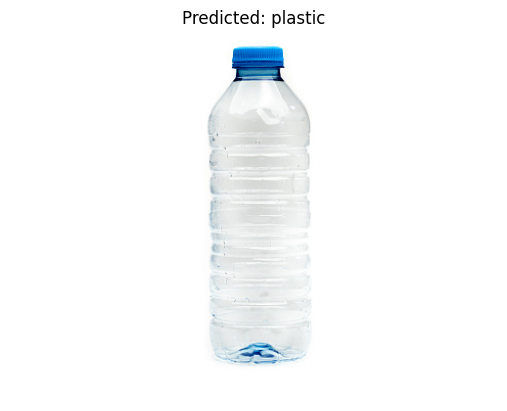

In [ ]:
import pandas as pd
import numpy as np
import cv2  # Ensure you have OpenCV installed
from google.colab import files  # For file upload in Google Colab
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input

# Load the DenseNet model (pre-trained)
feature_extractor = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Load the train and test datasets
train_features_path = '/content/drive/My Drive/combined_features_labels.csv'
test_features_path = '/content/drive/My Drive/test_features.csv'

# Load the training features
train_data = pd.read_csv(train_features_path)
X_train = train_data.drop(columns=['Category']).values
y_train = train_data['Category'].values

# Train the SVM model with the best C value
best_C = 0.1  # Set your best C value here
model = make_pipeline(MinMaxScaler(), SVC(C=best_C, kernel='linear', max_iter=5000))
model.fit(X_train, y_train)

# Function to preprocess new images and extract features using DenseNet
def preprocess_and_extract_features(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224))  # Resize to 224x224
    img = preprocess_input(img)  # Preprocess for DenseNet
    features = feature_extractor.predict(np.expand_dims(img, axis=0))  # Get features
    return features

# Function to test uploaded images in batches
def test_uploaded_images(uploaded_files, batch_size=5):
    results = []
    batch_features = []
    batch_file_names = []

    for i, (file_name, file_content) in enumerate(uploaded_files.items()):
        # Read the uploaded image from bytes
        img = cv2.imdecode(np.frombuffer(file_content, np.uint8), cv2.IMREAD_COLOR)

        # Preprocess and extract features
        features = preprocess_and_extract_features(img)
        batch_features.append(features.flatten())  # Flatten features for batch
        batch_file_names.append(file_name)

        # If batch is full, make predictions
        if (i + 1) % batch_size == 0 or (i + 1) == len(uploaded_files):
            # Convert batch features to array
            batch_features_array = np.array(batch_features)

            # Predict the categories for the batch
            predicted_categories = model.predict(batch_features_array)

            # Append results
            for name, category in zip(batch_file_names, predicted_categories):
                results.append((name, category))
                print(f"Image: {name}, Predicted Category: {category}")

            # Clear batch
            batch_features = []
            batch_file_names = []

    return results

# Upload images
uploaded_files = files.upload()

# Test the uploaded images
results = test_uploaded_images(uploaded_files, batch_size=5)

# Optional: Visualize the results
for image_file, predicted_category in results:
    img = cv2.imread(image_file)  # Load the image again for display
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {predicted_category}")
    plt.axis('off')
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
import cv2  # Ensure you have OpenCV installed
from google.colab import files  # For file upload in Google Colab
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import preprocess_input

# Load the pre-trained DenseNet model
feature_extractor = DenseNet121(weights='imagenet', include_top=False, pooling='avg')

# Load the SVM model (assuming it's already fitted)
# You might load the model from a file if you saved it
# For example: from joblib import load
# model = load('svm_model.joblib')

# Function to preprocess and extract features from new images
def preprocess_and_extract_features(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (224, 224))  # Resize to 224x224
    img = preprocess_input(img)  # Preprocess for DenseNet
    features = feature_extractor.predict(np.expand_dims(img, axis=0))  # Get features
    return features.flatten()

# Function to test uploaded images
def test_new_images(uploaded_files):
    results = []

    for file_name, file_content in uploaded_files.items():
        img = cv2.imdecode(np.frombuffer(file_content, np.uint8), cv2.IMREAD_COLOR)
        features = preprocess_and_extract_features(img)
        predicted_category = model.predict(features.reshape(1, -1))[0]  # Predict category
        results.append((file_name, predicted_category))
        print(f"Image: {file_name}, Predicted Category: {predicted_category}")

    return results

# Upload images
uploaded_files = files.upload()

# Test the uploaded images
results = test_new_images(uploaded_files)

# Optional: Visualize the results
for image_file, predicted_category in results:
    img = cv2.imread(image_file)  # Load the image again for display
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {predicted_category}")
    plt.axis('off')
    plt.show()
